## Usage of the MCI

In [1]:
import simdata
import Train_nuisance
import numpy as np
from scipy.special import expit  # equivalent to R's plogis
from MCI import train_nuisance_func, Marginal_Cox_Instrumental, plot_MCI_Hazard, plot_MCI_Surv, ps_nn
from Train_nuisance import ps_kernel, ps_nn, ps_spline, S_coxph, S_rfs
par = {
    'tau': 1,  # cut censoring time at tau
    'psi': -0.5,  # hazards ratio of interest
    
    'D_surv': lambda t, A, psi: np.exp(- np.exp(A * psi) * t),
    # baseline hazards ratio
    
    'f': lambda X1, X2: expit(np.sin(X1) + 
                              0.5 * np.sin(X2)),
    # generate Pr(Z=1|X)
    
    'deltaA': lambda X1, X2, U: np.tanh(0.7 + 0.4 * np.sin(2*X1)),
    # generate Pr(A=1|Z=1,X,U)-Pr(A=1|Z=0,X,U)
    
    'OPA': lambda X1, X2, U: np.exp(-2 - U + np.cos(X1 * 0.5)),
    # generate Pr(A=1|Z=1,X,U)/(1-.)*Pr(A=1|Z=0,X,U)/(1-.)
    
    'C_mean': lambda Z, A, X1, X2, U: np.exp(-(0.5 * Z - 0.5 * A + 
                                              0.5 * X1 - 0.5 * X2)+0.5)
    # generate C|Z,A,X,U from Cox PH model
}
sim = simdata.sim_cox_instrumental2(n=2000, par=par, shape=1)
simdat = sim['simdat']

In [3]:
# import pandas as pd
# table = pd.crosstab(simdat['Z'], simdat['A'])

# print(table)
# print(simdat.describe())
# print(sim['simdat_unobs'].describe())

In [4]:
model = train_nuisance_func(simdat, Kfold=2, accuracy=200, min_val=10e-2,
                            method_SD=['cox',100,20], method_SC=['cox',100,20], 
                            method_ps=['kernel',0.01,[100]])

In [5]:
fit_MCI = Marginal_Cox_Instrumental(simdat, model)

c:\Users\13267\Desktop\Marginal_Cox\final\coding\MCI.py:171: RuntimeWarning: divide by zero encountered in log
  par_aug = np.log((R1_avg[0] - R1_avg) / G_aug.mean(axis=0))
c:\Users\13267\Desktop\Marginal_Cox\final\coding\MCI.py:205: RuntimeWarning: divide by zero encountered in log
  par_or = np.log((gamma1_avg[0] - gamma1_avg) / G_or.mean(axis=0))
c:\Users\13267\Desktop\Marginal_Cox\final\coding\MCI.py:241: RuntimeWarning: divide by zero encountered in log
  par_ipw = np.log((ipw1_avg[0] - ipw1_avg) / G_ipw.mean(axis=0))
c:\Users\13267\Desktop\Marginal_Cox\final\coding\MCI.py:255: RuntimeWarning: invalid value encountered in divide
  std_aug = np.sqrt(U_aug.var(axis=0) / G_aug.mean(axis=0)**2 / n)
c:\Users\13267\Desktop\Marginal_Cox\final\coding\MCI.py:256: RuntimeWarning: invalid value encountered in divide
  std_or = np.sqrt(U_or.var(axis=0) / G_or.mean(axis=0)**2 / n)
c:\Users\13267\Desktop\Marginal_Cox\final\coding\MCI.py:257: RuntimeWarning: invalid value encountered in divide
 

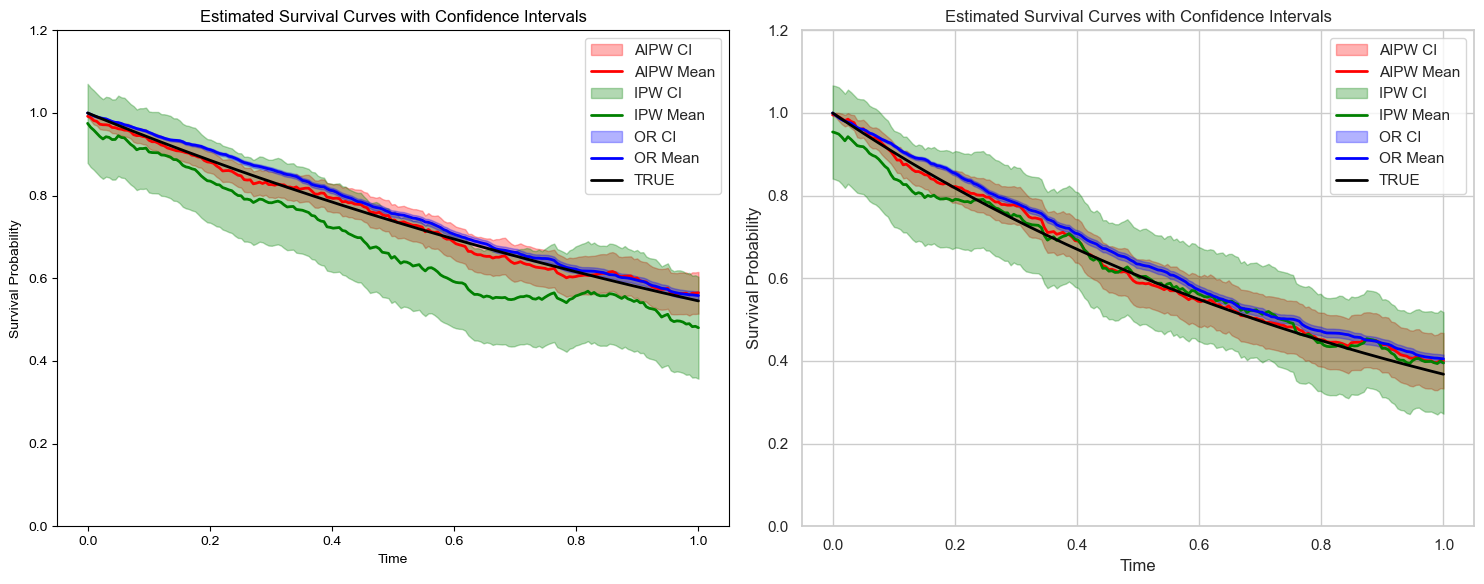

In [6]:
plot_MCI_Surv(fit_MCI, par, shape=1)

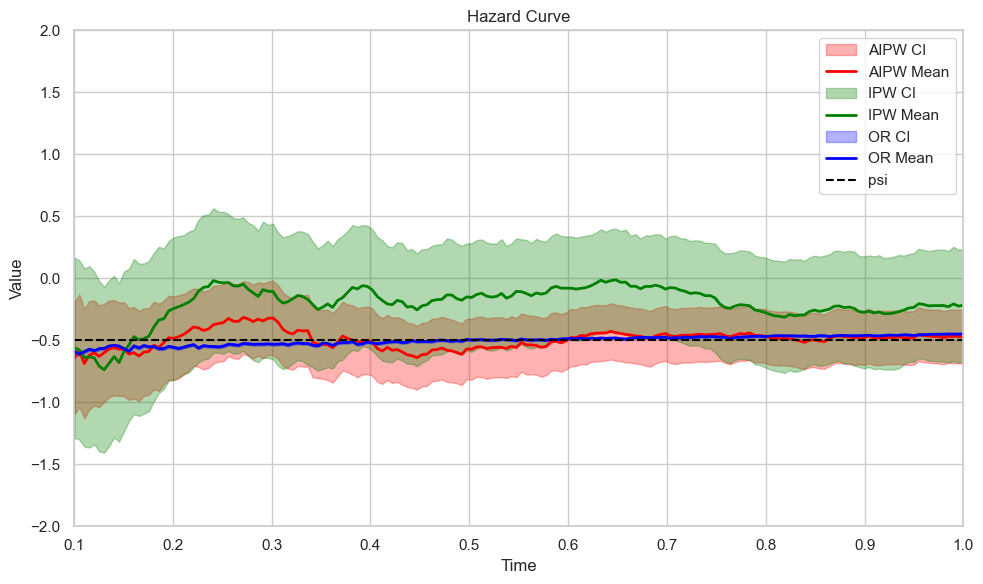

In [7]:
plot_MCI_Hazard(fit_MCI, par)